In [0]:
# Importing useful packages
import os
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

#Set the working directory
os.chdir('C:/Users/hubne/OneDrive/Documents/MASTER2/ICE/proteom_project')

### Create a list containing the words
# Open the file as read-only
file = open('english-words.txt', "r")

# use readlines to read all lines of the file
# The variable "words" is a list containing all the lines of the file i.e. all the words
words = file.readlines()
# close the file after reading lines and the importation in 'words'
file.close()
##

### Create a list containing the proteom (a line per protein)
# First we have to clean the fasta file
# by removing lines starting by "<" 
fichier_in = open("human-proteome.fasta","r") #Open the file as read-only

#create an output file with the proteom without sequence names
with open("clean-proteom.txt", "w") as fichier_out: #The new data file will be named clean-protem in .txt format
    for ligne in fichier_in:
        if ligne.startswith(">") == False: # If the line doesn't start by ">"
            fichier_out.write(ligne)       # write the line in a new data
fichier_in.close()
fichier_out.close() #Close the file

#Now we have a file with the cleaned proteome where each line corresponds to a protein
#So we're going to import this file
file = open("clean-proteom.txt", "r")
proteom = file.readlines() #extract the proteins 
file.close()
#

### Search for English words in the proteom
word_in_proteom = [] #creation of a variable to be filled with the words found in the proteom
for j in range(0,len(words)):
    for i in range(0,len(proteom)):
        if (proteom[i].find(words[j].upper())) != -1: #Find word j in the protein i
            print(words[j])
            word_in_proteom.append (words[j]) #Add the found word to the list
            
print(word_in_proteom)

#Sometimes words are followed by a space
#So we're going to delete the spaces
for i in range(0,len(word_in_proteom)):
    word_in_proteom[i] = word_in_proteom[i].strip()  # .strip remove spaces
         
# word_in_proteom there is sometimes the same word found several times
#so we're going to delete the duplicates in a new variables 'word_in_proteom_clean'     
word_in_proteom_clean = list(set(word_in_proteom))    #remove duplicates and make another list       


### Exploration of results

#Obtaining the size of each word found in the proteome
size_words = []
for i in range(0, len(word_in_proteom_clean)):
    size_words.append (len(word_in_proteom_clean[i])) 
print(size_words)


#Obtaining the size of each most common word in the dictionary
size_total = []
for i in range(0, len(words)):
    size_total.append (len(words[i]))
print(size_total)

# Make plots
plt.subplot(1,2,1) #Put both plots in the same frame
plt.hist(size_total, density = True) #frequency of word size in the dictionary
plt.xlabel('number of letters by words')
plt.ylabel('frequency')
plt.title('Frequency of words size (a) most common in the dictionnary (b) found in the proteom')
plt.annotate('(a)', (15,0.20)) #write an index

plt.subplot(1,2,2)
plt.hist(size_words, density = True) #frequency of word size found in the proteom
plt.xlabel('number of letters by words')
plt.annotate('(b)', (5,1.1)) #write an index

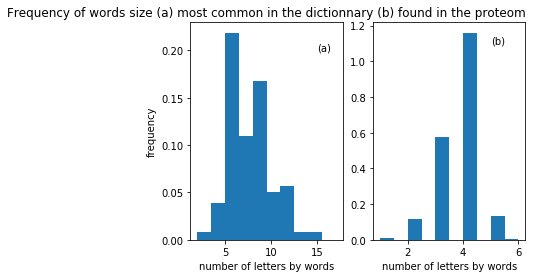

In [0]:
#Get the number of words starting with each letter of the alphabet
alphaB = ('a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z') 
 
lettres_occ = [ 0 ] * 26       #make an empty variable to fill with the number of words starting by each letter of the alphabet
for i in range(0, len(word_in_proteom_clean)) :
    for j in range(0,len(alphaB)) :
        if word_in_proteom_clean[i][0] == alphaB[j] :
            lettres_occ[j] = lettres_occ[j] + 1    #If a word start by the letters[j] add one
            
#Graph of the number of words beginning with each letter
plt.bar(alphaB, lettres_occ)
plt.xlabel('first letter')
plt.ylabel('number of words') 

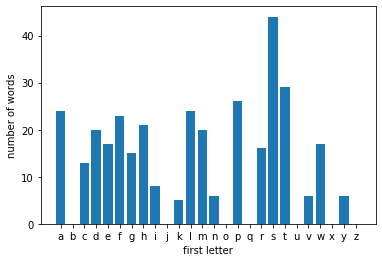